In [1]:
%matplotlib inline
from IPython.display import display

import torch
import random
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from matplotlib import pyplot
import seaborn as sns
import os
import sys

#Plotting 
from pandas.plotting import scatter_matrix

#Libraries for Statistical Models
import statsmodels.api as sm

#logging
from MyPyUtil.logconf import logging
log = logging.getLogger(__name__)
# log.setLevel(logging.ERROR)
log.setLevel(logging.INFO)
# log.setLevel(logging.WARN)
# log.setLevel(logging.DEBUG)


#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.expand_frame_repr = False
pd.options.display.float_format = '{:.3f}'.format

# max output width in numpy
np.set_printoptions(
    threshold=sys.maxsize,  # 20,
    edgeitems=10,
    linewidth=140,
    formatter=dict(float=lambda x: "%.3g" % x),
)  # float arrays %.3g


torch.seed = 42
random.seed(42)
np.random.seed(42)

data_dir = f'{os.getcwd()}/data/'

In [2]:
stk_symbols = [
    "AAPL",
    "MSFT",
    "AMZN",
    "NVDA",
    "GOOGL",
    "GOOG",
    "META",
    "TSLA",
    "UNH",
    "LLY",
    "JPM",
    "XOM",
    "JNJ",
    "V",
    "PG",
    "AVGO",
    "MA",
    "HD",
    "CVX",
    "MRK",
    "ABBV",
    "PEP",
    "COST",
    "ADBE",
    "KO",
    "CSCO",
    "WMT",
    "TMO",
    "MCD",
    "PFE",
    "CRM",
    "BAC",
    "ACN",
    "CMCSA",
    "LIN",
    "NFLX",
    "ABT",
    "ORCL",
    "DHR",
    "AMD",
    "WFC",
    "DIS",
    "TXN",
    "PM",
    "VZ",
    "INTU",
    "COP",
    "CAT",
    "AMGN",
    "NEE",
    "INTC",
    "UNP",
    "LOW",
    "IBM",
    "BMY",
    "SPGI",
    "RTX",
    "HON",
    "BA",
    "UPS",
    "GE",
    "QCOM",
    "AMAT",
    "NKE",
    "PLD",
    "NOW",
    "BKNG",
    "SBUX",
    "MS",
    "ELV",
    "MDT",
    "GS",
    "DE",
    "ADP",
    "LMT",
    "TJX",
    "T",
    "BLK",
    "ISRG",
    "MDLZ",
    "GILD",
    "MMC",
    "AXP",
    "SYK",
    "REGN",
    "VRTX",
    "ETN",
    "LRCX",
    "ADI",
    "SCHW",
    "CVS",
    "ZTS",
    "CI",
    "CB",
    "AMT",
    "SLB",
    "C",
    "BDX",
    "MO",
    "PGR",
    "TMUS",
    "FI",
    "SO",
    "EOG",
    "BSX",
    "CME",
    "EQIX",
    "MU",
    "DUK",
    "PANW",
    "PYPL",
    "AON",
    "SNPS",
    "ITW",
    "KLAC",
    "LULU",
    "ICE",
    "APD",
    "SHW",
    "CDNS",
    "CSX",
    "NOC",
    "CL",
    "MPC",
    "HUM",
    "FDX",
    "WM",
    "MCK",
    "TGT",
    "ORLY",
    "HCA",
    "FCX",
    "EMR",
    "PXD",
    "MMM",
    "MCO",
    "ROP",
    "CMG",
    "PSX",
    "MAR",
    "PH",
    "APH",
    "GD",
    "USB",
    "NXPI",
    "AJG",
    "NSC",
    "PNC",
    "VLO",
    "GBP",
    "F",
    "MSI",
    "GM",
    "TT",
    "EW",
    "CARR",
    "AZO",
    "ADSK",
    "TDG",
    "ANET",
    "SRE",
    "ECL",
    "OXY",
    "PCAR",
    "ADM",
    "MNST",
    "KMB",
    "PSA",
    "CCI",
    "CHTR",
    "MCHP",
    "MSCI",
    "CTAS",
    "WMB",
    "AIG",
    "STZ",
    "HES",
    "NUE",
    "ROST",
    "AFL",
    "AEP",
    "IDXX",
    "D",
    "TEL",
    "JCI",
    "MET",
    "GIS",
    "IQV",
    "EXC",
    "WELL",
    "DXCM",
    "HLT",
    "ON",
    "COF",
    "PAYX",
    "TFC",
    "USD",
    "BIIB",
    "O",
    "FTNT",
    "DOW",
    "TRV",
    "DLR",
    "MRNA",
    "CPRT",
    "ODFL",
    "DHI",
    "YUM",
    "SPG",
    "CTSH",
    "AME",
    "BKR",
    "SYY",
    "A",
    "CTVA",
    "CNC",
    "EL",
    "AMP",
    # "CEG",  # PCT <= -0.05,  size = 0
    "HAL",
    # "OTIS",  # PCT <= -0.05,  size = 0
    "ROK",
    "PRU",
    "DD",
    "KMI",
    "VRSK",
    "LHX",
    "DG",
    "FIS",
    "CMI",
    "CSGP",
    "FAST",
    "PPG",
    "GPN",
    "GWW",
    "HSY",
    "BK",
    "XEL",
    "DVN",
    "EA",
    "NEM",
    "ED",
    "URI",
    "VICI",
    "PEG",
    "KR",
    "RSG",
    "LEN",
    "PWR",
    "WST",
    "COR",
    "OKE",
    "VMC",
    "KDP",
    "WBD",
    "ACGL",
    "ALL",
    "IR",
    "CDW",
    "FANG",
    "MLM",
    "PCG",
    "DAL",
    "EXR",
    "FTV",
    "AWK",
    "IT",
    "KHC",
    # "GEHC",  # PCT <= -0.05,  size = 0
    "WEC",
    "HPQ",
    "EIX",
    "CBRE",
    "APTV",
    "ANSS",
    "MTD",
    "DLTR",
    "AVB",
    "ILMN",
    "ALGN",
    "LYB",
    "TROW",
    "GLW",
    "EFX",
    "WY",
    "ZBH",
    "XYL",
    "SBAC",
    "RMD",
    "TSCO",
    "EBAY",
    "KEYS",
    "CHD",
    "STT",
    "DFS",
    "HIG",
    "ALB",
    "STE",
    "ES",
    "TTWO",
    "MPWR",
    "CAH",
    "EQR",
    "RCL",
    "WTW",
    "HPE",
    "DTE",
    "GPC",
    "BR",
    "ULTA",
    "FICO",
    "CTRA",
    "BAX",
    "AEE",
    "MTB",
    "MKC",
    "ETR",
    "WAB",
    "DOV",
    "FE",
    "RJF",
    "INVH",
    "FLT",
    "CLX",
    "TDY",
    "TRGP",
    "DRI",
    "LH",
    "HOLX",
    "VRSN",
    "MOH",
    "LUV",
    "PPL",
    "ARE",
    "NVR",
    "COO",
    "WBA",
    "PHM",
    "NDAQ",
    "HWM",
    "RF",
    "CNP",
    "IRM",
    "LVS",
    "FITB",
    "EXPD",
    "VTR",
    "FSLR",
    "PFG",
    "BRO",
    "J",
    "IEX",
    "BG",
    "ATO",
    "FDS",
    "ENPH",
    "MAA",
    "CMS",
    "IFF",
    "BALL",
    "SWKS",
    "CINF",
    "NTAP",
    "STLD",
    "UAL",
    "WAT",
    "OMC",
    "TER",
    "CCL",
    "JBHT",
    "MRO",
    "TYL",
    "HBAN",
    "K",
    "GRMN",
    "CBOE",
    "NTRS",
    "TSN",
    "AKAM",
    "EG",
    "ESS",
    "EQT",
    "TXT",
    "EXPE",
    "SJM",
    "PTC",
    "DGX",
    "AVY",
    "RVTY",
    "BBY",
    "CF",
    "CAG",
    "EPAM",
    "AMCR",
    "LW",
    "PAYC",
    "SNA",
    "AXON",
    "POOL",
    "SYF",
    "SWK",
    "ZBRA",
    "DPZ",
    "PKG",
    "CFG",
    "LDOS",
    "VTRS",
    "PODD",
    "LKQ",
    "MOS",
    "APA",
    "EVRG",
    "TRMB",
    "MGM",
    "NDSN",
    "WDC",
    "MAS",
    "LNT",
    "IPG",
    "MTCH",
    "STX",
    "KMX",
    "TECH",
    "WRB",
    "LYV",
    "IP",
    "UDR",
    "AES",
    "CE",
    "INCY",
    "L",
    "TAP",
    "GEN",
    "CPT",
    "KIM",
    "JKHY",
    "HRL",
    "HST",
    "FMC",
    "CZR",
    "PEAK",
    "CDAY",
    "PNR",
    "NI",
    "CHRW",
    "HSIC",
    "CRL",
    "REG",
    "QRVO",
    "TFX",
    "KEY",
    "GL",
    "EMN",
    "WYNN",
    "ALLE",
    "AAL",
    "FFIV",
    "BWA",
    "BXP",
    "MKTX",
    "ROL",
    "JNPR",
    "PNW",
    "ETSY",
    "BLDR",
    "FOXA",
    "AOS",
    "HAS",
    "HII",
    "NRG",
    "CPB",
    "UHS",
    "BIO",
    "WRK",
    "RHI",
    "CTLT",
    "XRAY",
    "BBWI",
    "NWSA",
    "TPR",
    "PARA",
    "WHR",
    "BEN",
    "AIZ",
    "NCLH",
    "GNRC",
    "FRT",
    "IVZ",
    "VFC",
    "CMA",
    "DVA",
    "JBL",
    "HUBB",
    "ZION",
    "UBER",
    "MHK",
    "RL",
    "FOX",
    "BX",
    "ABNB",
    "NWS",
]

In [3]:
all_sectors = [
    "Technology",
    "Financial Services",
    "Healthcare",
    "Consumer Cyclical",
    "Industrials",
    "Communication Services",
    "Consumer Defensive",
    "Energy",
    "Basic Materials",
    "Real Estate",
    "Utilities",
]

In [4]:
import yfinance as yfin

if os.path.isfile("sectors.csv"):
    sectors_file = pd.read_csv("sectors.csv")
    sectors_file.drop("Unnamed: 0", axis=1, inplace=True)
    sectors_file.fillna("", inplace=True)
    tickers_sector = sectors_file.set_index("symbol").to_dict()["sector"]
else:
    tickers_info = [yfin.Ticker(symbol) for symbol in stk_symbols]
    tickers_sector = {
        t.info["symbol"]: t.info["sector"] if "sector" in t.info.keys() else ""
        for t in tickers_info
    }
    tickers_sector_df = pd.DataFrame(
        data={
            "symbol": list(tickers_sector.keys()),
            "sector": list(tickers_sector.values()),
        }
    )
    tickers_sector_df.to_csv("sectors.csv")

print(tickers_sector)

{'AAPL': 'Technology', 'MSFT': 'Technology', 'AMZN': 'Consumer Cyclical', 'NVDA': 'Technology', 'GOOGL': 'Communication Services', 'GOOG': 'Communication Services', 'META': 'Communication Services', 'TSLA': 'Consumer Cyclical', 'UNH': 'Healthcare', 'LLY': 'Healthcare', 'JPM': 'Financial Services', 'XOM': 'Energy', 'JNJ': 'Healthcare', 'V': 'Financial Services', 'PG': 'Consumer Defensive', 'AVGO': 'Technology', 'MA': 'Financial Services', 'HD': 'Consumer Cyclical', 'CVX': 'Energy', 'MRK': 'Healthcare', 'ABBV': 'Healthcare', 'PEP': 'Consumer Defensive', 'COST': 'Consumer Defensive', 'ADBE': 'Technology', 'KO': 'Consumer Defensive', 'CSCO': 'Technology', 'WMT': 'Consumer Defensive', 'TMO': 'Healthcare', 'MCD': 'Consumer Cyclical', 'PFE': 'Healthcare', 'CRM': 'Technology', 'BAC': 'Financial Services', 'ACN': 'Technology', 'CMCSA': 'Communication Services', 'LIN': 'Basic Materials', 'NFLX': 'Communication Services', 'ABT': 'Healthcare', 'ORCL': 'Technology', 'DHR': 'Healthcare', 'AMD': 'Tec

In [5]:
from datetime import datetime
import yfinance as yfin
from MyPyUtil.util import is_contained
from collections import namedtuple

tick_data_info = namedtuple("tick_data_info", "idx symbol sector tick_data")


def load_stk_data(stk_symbols, start, end, empty_vol_threshold):

    ticks_data = []
    for idx, symbol in enumerate(stk_symbols):
        if tickers_sector[symbol] == "":
            print(f"{symbol}: Its sector cannot be found")
            continue

        stk_file = f"{data_dir}{symbol}_{start.strftime('%Y%m%d')}-{end.strftime('%Y%m%d')}.csv"
        bLoad = False
        if os.path.isfile(stk_file):
            try:
                _stk_data = pd.read_csv(stk_file).set_index("Date")
                bLoad = True
                print(f"read {stk_file} completely!")
            except:
                None
        if bLoad == False:
            # _stk_data = web.get_data_yahoo(stk_tickers, start, end)
            _stk_data = yfin.download([symbol], start, end).dropna()
            _stk_data.to_csv(stk_file)
            print(f"download {symbol} from yfin and write to {stk_file} completely!")

        statistics = _stk_data.describe()
        if is_contained(statistics, 0):
            if is_contained(
                statistics.loc[:, ["Open", "High", "Low", "Close", "Adj Close"]], 0
            ) or is_contained(statistics.loc["std"], 0):
                print(f"{symbol}: contains numerical errors. Ignore it.")
                continue
            else:
                empty_vol_index = _stk_data[_stk_data["Volume"] == 0].index
                if len(empty_vol_index) > empty_vol_threshold:
                    print(
                        f"The total volume with a value of zero ({len(empty_vol_index)}) is greater than the threshold({empty_vol_threshold}). Ignore it."
                    )
                    continue
                print(
                    f"A total of {len(empty_vol_index)} volume values ​​are zero. Delete these data."
                )

                cleaned_data = _stk_data.drop(empty_vol_index)
                print(
                    f"The cleaned data size is {len(cleaned_data)}. The original data size is {len(_stk_data)}."
                )
                if len(cleaned_data) == 0:
                    continue
                _stk_data = cleaned_data

        ticks_data.append(
            tick_data_info(idx, symbol, tickers_sector[symbol], _stk_data)
        )
        print(f"{symbol}, size:{len(_stk_data)}")
    return ticks_data

In [6]:
import torch

device_name = (
    "cuda"
    if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available() else "cpu"
)
device = torch.device(device_name)
return_period = 5
seq_len = 3
validation_size = 0.2
epoch_num = 100
batch_size = 32
num_workers = 3
pin_memory = True
shuffle = True
empty_vol_threshold = 5
print(f"device_name:{device}")

device_name:cuda


In [7]:
pct_threshold = 0.04
class_percentage_threshold = 0  # percentage threshold for class size
classificationThreshold = 0.5


# # number of classes = 3
# # 0: PCT <= -0.05
# # 1: 0.05 < PCT < -0.05
# # 2: PCT >= 0.05
# num_classes = 3


# def gen_pct_label(stk_data, _return_period):
#     max_price_period = (
#         stk_data["Adj Close"].rolling(_return_period).max().shift(-_return_period)
#     )
#     max_pct_period = (max_price_period - stk_data["Adj Close"]) / stk_data["Adj Close"]
#     pct_label = max_pct_period.apply(
#         lambda x: 2 if x >= pct_threshold else 0 if x <= -pct_threshold else 1
#     ).astype("int8")
#     pct_label.name = "label"
#     return pct_label


# number of classes = 2
# 0: PCT < 0.05
# 1: PCT >= -0.05
num_classes = 2


def gen_pct_label(stk_data, _return_period):
    max_price_period = (
        stk_data["Adj Close"].rolling(_return_period).max().shift(-_return_period)
    )
    max_pct_period = (max_price_period - stk_data["Adj Close"]) / stk_data["Adj Close"]
    pct_label = max_pct_period.apply(lambda x: 1 if x >= pct_threshold else 0).astype(
        "int8"
    )
    pct_label.name = "label"
    return pct_label


def class_percentage(analysis_data):
    stat = analysis_data.groupby("label").size()
    total = len(analysis_data)
    p = []
    for i in range(num_classes):
        p.append(stat[i] / total if i in stat.index else 0.0)
    return p

In [8]:
# data1 = load_stk_data(
#     stk_symbols, datetime(2014, 1, 1), datetime(2019, 12, 31), empty_vol_threshold
# )
# len(data1)
data2 = load_stk_data(
    stk_symbols, datetime(2021, 1, 1), datetime(2022, 11, 9), empty_vol_threshold
)
data3 = load_stk_data(
    stk_symbols,
    datetime(2023, 1, 1),
    datetime(2023, 12, 31),
    empty_vol_threshold,
)

read /mnt/AIWorkSpace/work/AI4StockMarket/data/AAPL_20210101-20221109.csv completely!
AAPL, size:467
read /mnt/AIWorkSpace/work/AI4StockMarket/data/MSFT_20210101-20221109.csv completely!
MSFT, size:467
read /mnt/AIWorkSpace/work/AI4StockMarket/data/AMZN_20210101-20221109.csv completely!
AMZN, size:467
read /mnt/AIWorkSpace/work/AI4StockMarket/data/NVDA_20210101-20221109.csv completely!
NVDA, size:467
read /mnt/AIWorkSpace/work/AI4StockMarket/data/GOOGL_20210101-20221109.csv completely!
GOOGL, size:467
read /mnt/AIWorkSpace/work/AI4StockMarket/data/GOOG_20210101-20221109.csv completely!
GOOG, size:467
read /mnt/AIWorkSpace/work/AI4StockMarket/data/META_20210101-20221109.csv completely!
META, size:467
read /mnt/AIWorkSpace/work/AI4StockMarket/data/TSLA_20210101-20221109.csv completely!
TSLA, size:467
read /mnt/AIWorkSpace/work/AI4StockMarket/data/UNH_20210101-20221109.csv completely!
UNH, size:467
read /mnt/AIWorkSpace/work/AI4StockMarket/data/LLY_20210101-20221109.csv completely!
LLY, s

In [40]:
ticks_data = []
# ticks_data.extend(data1)
# ticks_data.extend(data2)
ticks_data.extend(data3)
print(len(ticks_data))

496


In [18]:
def to_adjusted(stk_data):
    """
    Adjusted Open = Open * Adjusted Close / Close
    Adjusted High = High * Adjusted Close / Close
    Adjusted Low = Low * Adjusted Close / Close
    Adjusted volume = Volume / (Adjusted Close / Close)
    """
    ratio_data = stk_data["Adj Close"] / stk_data["Close"]
    adjusted_OHLV = pd.DataFrame(index=stk_data.index)
    adjusted_OHLV["Adj Open"] = ratio_data * stk_data["Open"]
    adjusted_OHLV["Adj High"] = ratio_data * stk_data["High"]
    adjusted_OHLV["Adj Low"] = ratio_data * stk_data["Low"]
    adjusted_OHLV["Adj Close"] = stk_data["Adj Close"]
    adjusted_OHLV["Adj Volume"] = (ratio_data * stk_data["Volume"]).astype("int")
    adjusted_OHLV["Pre Adj Close"] = stk_data["Adj Close"].shift(1)
    adjusted_OHLV["Pre Adj Volume"] = adjusted_OHLV["Adj Volume"].shift(1)
    adjusted_OHLV = adjusted_OHLV.dropna()
    adjusted_OHLV["Pre Adj Volume"] = adjusted_OHLV["Pre Adj Volume"].astype("int")
    adjusted_OHLV["B4_Adj Open pct"] = (
        adjusted_OHLV["Adj Open"] - adjusted_OHLV["Pre Adj Close"]
    ) / adjusted_OHLV["Pre Adj Close"]
    adjusted_OHLV["B4_Adj High pct"] = (
        adjusted_OHLV["Adj High"] - adjusted_OHLV["Pre Adj Close"]
    ) / adjusted_OHLV["Pre Adj Close"]
    adjusted_OHLV["B4_Adj Low pct"] = (
        adjusted_OHLV["Adj Low"] - adjusted_OHLV["Pre Adj Close"]
    ) / adjusted_OHLV["Pre Adj Close"]
    adjusted_OHLV["B4_Adj Volume pct"] = (
        adjusted_OHLV["Adj Volume"] - adjusted_OHLV["Pre Adj Volume"]
    ) / adjusted_OHLV["Pre Adj Volume"]

    return adjusted_OHLV


def gen_buy_sell_signal(stk_data):
    import pandas_ta as ta

    sma = pd.concat(
        [
            stk_data.ta.sma(close="Adj Close", length=10),
            stk_data.ta.sma(close="Adj Close", length=60),
        ],
        axis=1,
    ).dropna()
    buy_signal = sma["SMA_10"] > sma["SMA_60"]

    buy_sell_signal = stk_data[[]].copy()
    buy_sell_signal["Signal"] = (buy_signal).astype("int")

    return buy_sell_signal


def gen_analysis_data(stk_data, _return_period):
    import pandas_ta as ta

    try:
        adjusted_OHLV = to_adjusted(stk_data)
        data = pd.concat(
            [
                # stk_data.ta.adosc(prefix="B1"),
                # stk_data.ta.kvo(prefix="B1"),
                adjusted_OHLV.ta.adosc(
                    high="Adj High",
                    low="Adj Low",
                    close="Adj Close",
                    volume="Adj Volume",
                    prefix="B2",
                ),
                adjusted_OHLV.ta.kvo(
                    high="Adj High",
                    low="Adj Low",
                    close="Adj Close",
                    volume="Adj Volume",
                    prefix="B2",
                ),
                stk_data.ta.rsi(close="Adj Close", length=10, prefix="B3"),
                stk_data.ta.rsi(close="Adj Close", length=30, prefix="B3"),
                # stk_data.ta.rsi(close="Adj Close", length=200, prefix="B3"),
                stk_data.ta.stoch(k=10, prefix="B3"),
                stk_data.ta.stoch(k=30, prefix="B3"),
                # stk_data.ta.stoch(k=200, prefix="B3"),
                adjusted_OHLV.loc[
                    :,
                    [
                        "B4_Adj Open pct",
                        "B4_Adj High pct",
                        "B4_Adj Low pct",
                        "B4_Adj Volume pct",
                    ],
                ],
                gen_buy_sell_signal(stk_data),
            ],
            axis=1,
        )

        data = pd.concat(
            [data.astype("float32"), gen_pct_label(stk_data, _return_period)],
            axis=1,
        ).dropna()
    except:
        data = None
    return data

In [41]:
ticks_len = pd.DataFrame([len(t.tick_data) for t in ticks_data])
ticks_len.describe()

,0
count,496.000
mean,249.998
std,0.045
min,249.000
25%,250.000
50%,250.000
75%,250.000
max,250.000


In [42]:
data_len_thresshold = 0  # 1500

verified_data = []
ignore_ticks_data_count = 0
for tdi in ticks_data:
    analysis_data = gen_analysis_data(tdi.tick_data, return_period)
    if analysis_data is None:
        print(f"Failed to generate {tdi.symbol} analysis data")
        ignore_ticks_data_count += 1
        continue
    classes_percentage = class_percentage(analysis_data)
    if 0 in classes_percentage:
        print(f"Some classes don't have any data  : {tdi.symbol}, {classes_percentage}")
        ignore_ticks_data_count += 1
    elif any(p < class_percentage_threshold for p in classes_percentage):
        print(f"Some classes are too small  : {tdi.symbol}, {classes_percentage}")
        ignore_ticks_data_count += 1
    elif len(tdi.tick_data) < data_len_thresshold:
        print(
            f"Not all data is available on certain days  : {tdi.symbol}, {len(tdi.tick_data)}"
        )
        ignore_ticks_data_count += 1
    else:
        verified_data.append(tdi)

if ignore_ticks_data_count > 0:
    print(
        f"There are {ignore_ticks_data_count} stocks in total, some classes have no data or are too small"
    )

Some classes don't have any data  : KO, [1.0, 0.0]
There are 1 stocks in total, some classes have no data or are too small


In [43]:
pct_labels = []
for tdi in verified_data:
    max_price_period = (
        tdi.tick_data["Adj Close"].rolling(return_period).max().shift(-return_period)
    )
    max_pct_period = (max_price_period - tdi.tick_data["Adj Close"]) / tdi.tick_data[
        "Adj Close"
    ]
    pct_label = max_pct_period  # max_pct_period.apply(lambda x: 1 if x >= pct_threshold else 0).astype("int8")
    pct_label.name = f"{tdi.symbol}"
    pct_labels.append(pct_label)


all_labels = pd.concat(pct_labels, axis=1)
display(all_labels.iloc[:, :10].head())

,AAPL,MSFT,AMZN,NVDA,GOOGL,GOOG,META,TSLA,UNH,LLY
Date,,,,,,,,,,
2023-01-03,0.045,-0.044,0.047,0.111,-0.008,-0.005,0.066,0.108,-0.027,-0.005
2023-01-04,0.056,0.029,0.117,0.085,0.039,0.040,0.044,0.084,-0.022,-0.000
2023-01-05,0.068,0.073,0.146,0.157,0.062,0.063,0.077,0.120,0.012,0.011
2023-01-06,0.040,0.064,0.140,0.137,0.055,0.053,0.054,0.093,0.012,-0.004
2023-01-09,0.044,0.058,0.123,0.133,0.047,0.045,0.058,0.098,0.011,0.034


In [44]:
display(all_labels.shape)
all_labels.isna().sum(axis=0).sort_values().head(10)

(250, 495)

AAPL    5
LVS     5
IRM     5
CNP     5
RF      5
HWM     5
NDAQ    5
PHM     5
WBA     5
COO     5
dtype: int64

In [45]:
display(all_labels.describe())
all_labels.dropna(inplace=True)
display(all_labels.describe())

,AAPL,MSFT,AMZN,NVDA,GOOGL,GOOG,META,TSLA,UNH,LLY,JPM,XOM,JNJ,V,PG,AVGO,MA,HD,CVX,MRK,ABBV,PEP,COST,ADBE,CSCO,WMT,TMO,MCD,PFE,CRM,BAC,ACN,CMCSA,LIN,NFLX,ABT,ORCL,DHR,AMD,WFC,DIS,TXN,PM,VZ,INTU,COP,CAT,AMGN,NEE,INTC,UNP,LOW,IBM,BMY,SPGI,RTX,HON,BA,UPS,GE,QCOM,AMAT,NKE,PLD,NOW,BKNG,SBUX,MS,ELV,MDT,GS,DE,ADP,LMT,TJX,T,BLK,ISRG,MDLZ,GILD,MMC,AXP,SYK,REGN,VRTX,ETN,LRCX,ADI,SCHW,CVS,ZTS,CI,CB,AMT,SLB,C,BDX,MO,PGR,TMUS,FI,SO,EOG,BSX,CME,EQIX,MU,DUK,PANW,PYPL,AON,SNPS,ITW,KLAC,LULU,ICE,APD,SHW,CDNS,CSX,NOC,CL,MPC,HUM,FDX,WM,MCK,TGT,ORLY,HCA,FCX,EMR,PXD,MMM,MCO,ROP,CMG,PSX,MAR,PH,APH,GD,USB,NXPI,AJG,NSC,PNC,VLO,F,MSI,GM,TT,EW,CARR,AZO,ADSK,TDG,ANET,SRE,ECL,OXY,PCAR,ADM,MNST,KMB,PSA,CCI,CHTR,MCHP,MSCI,CTAS,WMB,AIG,STZ,HES,NUE,ROST,AFL,AEP,IDXX,D,TEL,JCI,MET,GIS,IQV,EXC,WELL,DXCM,HLT,ON,COF,PAYX,TFC,BIIB,O,FTNT,DOW,TRV,DLR,MRNA,CPRT,ODFL,DHI,YUM,SPG,CTSH,AME,BKR,SYY,A,CTVA,CNC,EL,AMP,HAL,ROK,PRU,DD,KMI,VRSK,LHX,DG,FIS,CMI,CSGP,FAST,PPG,GPN,GWW,HSY,BK,XEL,DVN,EA,NEM,ED,URI,VICI,PEG,KR,RSG,LEN,PWR,WST,COR,OKE,VMC,KDP,WBD,ACGL,ALL,IR,CDW,FANG,MLM,PCG,DAL,EXR,FTV,AWK,IT,KHC,WEC,HPQ,EIX,CBRE,APTV,ANSS,MTD,DLTR,AVB,ILMN,ALGN,LYB,TROW,GLW,EFX,WY,ZBH,XYL,SBAC,RMD,TSCO,EBAY,KEYS,CHD,STT,DFS,HIG,ALB,STE,ES,TTWO,MPWR,CAH,EQR,RCL,WTW,HPE,DTE,GPC,BR,ULTA,FICO,CTRA,BAX,AEE,MTB,MKC,ETR,WAB,DOV,FE,RJF,INVH,FLT,CLX,TDY,TRGP,DRI,LH,HOLX,VRSN,MOH,LUV,PPL,ARE,NVR,COO,WBA,PHM,NDAQ,HWM,RF,CNP,IRM,LVS,FITB,EXPD,VTR,FSLR,PFG,BRO,J,IEX,BG,ATO,FDS,ENPH,MAA,CMS,IFF,BALL,SWKS,CINF,NTAP,STLD,UAL,WAT,OMC,TER,CCL,JBHT,MRO,TYL,HBAN,K,GRMN,CBOE,NTRS,TSN,AKAM,EG,ESS,EQT,TXT,EXPE,SJM,PTC,DGX,AVY,RVTY,BBY,CF,CAG,EPAM,AMCR,LW,PAYC,SNA,AXON,POOL,SYF,SWK,ZBRA,DPZ,PKG,CFG,LDOS,VTRS,PODD,LKQ,MOS,APA,EVRG,TRMB,MGM,NDSN,WDC,MAS,LNT,IPG,MTCH,STX,KMX,TECH,WRB,LYV,IP,UDR,AES,CE,INCY,L,TAP,GEN,CPT,KIM,JKHY,HRL,HST,FMC,CZR,PEAK,CDAY,PNR,NI,CHRW,HSIC,CRL,REG,QRVO,TFX,KEY,GL,EMN,WYNN,ALLE,AAL,FFIV,BWA,BXP,MKTX,ROL,JNPR,PNW,ETSY,BLDR,FOXA,AOS,HAS,HII,NRG,CPB,UHS,BIO,WRK,RHI,CTLT,XRAY,BBWI,NWSA,TPR,PARA,WHR,BEN,AIZ,NCLH,GNRC,FRT,IVZ,VFC,CMA,DVA,JBL,HUBB,ZION,UBER,MHK,RL,FOX,BX,ABNB,NWS
count,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,244.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.000,245.00

,AAPL,MSFT,AMZN,NVDA,GOOGL,GOOG,META,TSLA,UNH,LLY,JPM,XOM,JNJ,V,PG,AVGO,MA,HD,CVX,MRK,ABBV,PEP,COST,ADBE,CSCO,WMT,TMO,MCD,PFE,CRM,BAC,ACN,CMCSA,LIN,NFLX,ABT,ORCL,DHR,AMD,WFC,DIS,TXN,PM,VZ,INTU,COP,CAT,AMGN,NEE,INTC,UNP,LOW,IBM,BMY,SPGI,RTX,HON,BA,UPS,GE,QCOM,AMAT,NKE,PLD,NOW,BKNG,SBUX,MS,ELV,MDT,GS,DE,ADP,LMT,TJX,T,BLK,ISRG,MDLZ,GILD,MMC,AXP,SYK,REGN,VRTX,ETN,LRCX,ADI,SCHW,CVS,ZTS,CI,CB,AMT,SLB,C,BDX,MO,PGR,TMUS,FI,SO,EOG,BSX,CME,EQIX,MU,DUK,PANW,PYPL,AON,SNPS,ITW,KLAC,LULU,ICE,APD,SHW,CDNS,CSX,NOC,CL,MPC,HUM,FDX,WM,MCK,TGT,ORLY,HCA,FCX,EMR,PXD,MMM,MCO,ROP,CMG,PSX,MAR,PH,APH,GD,USB,NXPI,AJG,NSC,PNC,VLO,F,MSI,GM,TT,EW,CARR,AZO,ADSK,TDG,ANET,SRE,ECL,OXY,PCAR,ADM,MNST,KMB,PSA,CCI,CHTR,MCHP,MSCI,CTAS,WMB,AIG,STZ,HES,NUE,ROST,AFL,AEP,IDXX,D,TEL,JCI,MET,GIS,IQV,EXC,WELL,DXCM,HLT,ON,COF,PAYX,TFC,BIIB,O,FTNT,DOW,TRV,DLR,MRNA,CPRT,ODFL,DHI,YUM,SPG,CTSH,AME,BKR,SYY,A,CTVA,CNC,EL,AMP,HAL,ROK,PRU,DD,KMI,VRSK,LHX,DG,FIS,CMI,CSGP,FAST,PPG,GPN,GWW,HSY,BK,XEL,DVN,EA,NEM,ED,URI,VICI,PEG,KR,RSG,LEN,PWR,WST,COR,OKE,VMC,KDP,WBD,ACGL,ALL,IR,CDW,FANG,MLM,PCG,DAL,EXR,FTV,AWK,IT,KHC,WEC,HPQ,EIX,CBRE,APTV,ANSS,MTD,DLTR,AVB,ILMN,ALGN,LYB,TROW,GLW,EFX,WY,ZBH,XYL,SBAC,RMD,TSCO,EBAY,KEYS,CHD,STT,DFS,HIG,ALB,STE,ES,TTWO,MPWR,CAH,EQR,RCL,WTW,HPE,DTE,GPC,BR,ULTA,FICO,CTRA,BAX,AEE,MTB,MKC,ETR,WAB,DOV,FE,RJF,INVH,FLT,CLX,TDY,TRGP,DRI,LH,HOLX,VRSN,MOH,LUV,PPL,ARE,NVR,COO,WBA,PHM,NDAQ,HWM,RF,CNP,IRM,LVS,FITB,EXPD,VTR,FSLR,PFG,BRO,J,IEX,BG,ATO,FDS,ENPH,MAA,CMS,IFF,BALL,SWKS,CINF,NTAP,STLD,UAL,WAT,OMC,TER,CCL,JBHT,MRO,TYL,HBAN,K,GRMN,CBOE,NTRS,TSN,AKAM,EG,ESS,EQT,TXT,EXPE,SJM,PTC,DGX,AVY,RVTY,BBY,CF,CAG,EPAM,AMCR,LW,PAYC,SNA,AXON,POOL,SYF,SWK,ZBRA,DPZ,PKG,CFG,LDOS,VTRS,PODD,LKQ,MOS,APA,EVRG,TRMB,MGM,NDSN,WDC,MAS,LNT,IPG,MTCH,STX,KMX,TECH,WRB,LYV,IP,UDR,AES,CE,INCY,L,TAP,GEN,CPT,KIM,JKHY,HRL,HST,FMC,CZR,PEAK,CDAY,PNR,NI,CHRW,HSIC,CRL,REG,QRVO,TFX,KEY,GL,EMN,WYNN,ALLE,AAL,FFIV,BWA,BXP,MKTX,ROL,JNPR,PNW,ETSY,BLDR,FOXA,AOS,HAS,HII,NRG,CPB,UHS,BIO,WRK,RHI,CTLT,XRAY,BBWI,NWSA,TPR,PARA,WHR,BEN,AIZ,NCLH,GNRC,FRT,IVZ,VFC,CMA,DVA,JBL,HUBB,ZION,UBER,MHK,RL,FOX,BX,ABNB,NWS
count,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.00

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
display(all_labels.describe())
rescale_labels = scaler.fit_transform(all_labels)
display(
    pd.DataFrame(
        rescale_labels, index=all_labels.index, columns=all_labels.columns
    ).describe()
)
pca = PCA()
pca.fit(rescale_labels)

,AAPL,MSFT,AMZN,NVDA,GOOGL,GOOG,META,TSLA,UNH,LLY,JPM,XOM,JNJ,V,PG,AVGO,MA,HD,CVX,MRK,ABBV,PEP,COST,ADBE,CSCO,WMT,TMO,MCD,PFE,CRM,BAC,ACN,CMCSA,LIN,NFLX,ABT,ORCL,DHR,AMD,WFC,DIS,TXN,PM,VZ,INTU,COP,CAT,AMGN,NEE,INTC,UNP,LOW,IBM,BMY,SPGI,RTX,HON,BA,UPS,GE,QCOM,AMAT,NKE,PLD,NOW,BKNG,SBUX,MS,ELV,MDT,GS,DE,ADP,LMT,TJX,T,BLK,ISRG,MDLZ,GILD,MMC,AXP,SYK,REGN,VRTX,ETN,LRCX,ADI,SCHW,CVS,ZTS,CI,CB,AMT,SLB,C,BDX,MO,PGR,TMUS,FI,SO,EOG,BSX,CME,EQIX,MU,DUK,PANW,PYPL,AON,SNPS,ITW,KLAC,LULU,ICE,APD,SHW,CDNS,CSX,NOC,CL,MPC,HUM,FDX,WM,MCK,TGT,ORLY,HCA,FCX,EMR,PXD,MMM,MCO,ROP,CMG,PSX,MAR,PH,APH,GD,USB,NXPI,AJG,NSC,PNC,VLO,F,MSI,GM,TT,EW,CARR,AZO,ADSK,TDG,ANET,SRE,ECL,OXY,PCAR,ADM,MNST,KMB,PSA,CCI,CHTR,MCHP,MSCI,CTAS,WMB,AIG,STZ,HES,NUE,ROST,AFL,AEP,IDXX,D,TEL,JCI,MET,GIS,IQV,EXC,WELL,DXCM,HLT,ON,COF,PAYX,TFC,BIIB,O,FTNT,DOW,TRV,DLR,MRNA,CPRT,ODFL,DHI,YUM,SPG,CTSH,AME,BKR,SYY,A,CTVA,CNC,EL,AMP,HAL,ROK,PRU,DD,KMI,VRSK,LHX,DG,FIS,CMI,CSGP,FAST,PPG,GPN,GWW,HSY,BK,XEL,DVN,EA,NEM,ED,URI,VICI,PEG,KR,RSG,LEN,PWR,WST,COR,OKE,VMC,KDP,WBD,ACGL,ALL,IR,CDW,FANG,MLM,PCG,DAL,EXR,FTV,AWK,IT,KHC,WEC,HPQ,EIX,CBRE,APTV,ANSS,MTD,DLTR,AVB,ILMN,ALGN,LYB,TROW,GLW,EFX,WY,ZBH,XYL,SBAC,RMD,TSCO,EBAY,KEYS,CHD,STT,DFS,HIG,ALB,STE,ES,TTWO,MPWR,CAH,EQR,RCL,WTW,HPE,DTE,GPC,BR,ULTA,FICO,CTRA,BAX,AEE,MTB,MKC,ETR,WAB,DOV,FE,RJF,INVH,FLT,CLX,TDY,TRGP,DRI,LH,HOLX,VRSN,MOH,LUV,PPL,ARE,NVR,COO,WBA,PHM,NDAQ,HWM,RF,CNP,IRM,LVS,FITB,EXPD,VTR,FSLR,PFG,BRO,J,IEX,BG,ATO,FDS,ENPH,MAA,CMS,IFF,BALL,SWKS,CINF,NTAP,STLD,UAL,WAT,OMC,TER,CCL,JBHT,MRO,TYL,HBAN,K,GRMN,CBOE,NTRS,TSN,AKAM,EG,ESS,EQT,TXT,EXPE,SJM,PTC,DGX,AVY,RVTY,BBY,CF,CAG,EPAM,AMCR,LW,PAYC,SNA,AXON,POOL,SYF,SWK,ZBRA,DPZ,PKG,CFG,LDOS,VTRS,PODD,LKQ,MOS,APA,EVRG,TRMB,MGM,NDSN,WDC,MAS,LNT,IPG,MTCH,STX,KMX,TECH,WRB,LYV,IP,UDR,AES,CE,INCY,L,TAP,GEN,CPT,KIM,JKHY,HRL,HST,FMC,CZR,PEAK,CDAY,PNR,NI,CHRW,HSIC,CRL,REG,QRVO,TFX,KEY,GL,EMN,WYNN,ALLE,AAL,FFIV,BWA,BXP,MKTX,ROL,JNPR,PNW,ETSY,BLDR,FOXA,AOS,HAS,HII,NRG,CPB,UHS,BIO,WRK,RHI,CTLT,XRAY,BBWI,NWSA,TPR,PARA,WHR,BEN,AIZ,NCLH,GNRC,FRT,IVZ,VFC,CMA,DVA,JBL,HUBB,ZION,UBER,MHK,RL,FOX,BX,ABNB,NWS
count,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.00

,AAPL,MSFT,AMZN,NVDA,GOOGL,GOOG,META,TSLA,UNH,LLY,JPM,XOM,JNJ,V,PG,AVGO,MA,HD,CVX,MRK,ABBV,PEP,COST,ADBE,CSCO,WMT,TMO,MCD,PFE,CRM,BAC,ACN,CMCSA,LIN,NFLX,ABT,ORCL,DHR,AMD,WFC,DIS,TXN,PM,VZ,INTU,COP,CAT,AMGN,NEE,INTC,UNP,LOW,IBM,BMY,SPGI,RTX,HON,BA,UPS,GE,QCOM,AMAT,NKE,PLD,NOW,BKNG,SBUX,MS,ELV,MDT,GS,DE,ADP,LMT,TJX,T,BLK,ISRG,MDLZ,GILD,MMC,AXP,SYK,REGN,VRTX,ETN,LRCX,ADI,SCHW,CVS,ZTS,CI,CB,AMT,SLB,C,BDX,MO,PGR,TMUS,FI,SO,EOG,BSX,CME,EQIX,MU,DUK,PANW,PYPL,AON,SNPS,ITW,KLAC,LULU,ICE,APD,SHW,CDNS,CSX,NOC,CL,MPC,HUM,FDX,WM,MCK,TGT,ORLY,HCA,FCX,EMR,PXD,MMM,MCO,ROP,CMG,PSX,MAR,PH,APH,GD,USB,NXPI,AJG,NSC,PNC,VLO,F,MSI,GM,TT,EW,CARR,AZO,ADSK,TDG,ANET,SRE,ECL,OXY,PCAR,ADM,MNST,KMB,PSA,CCI,CHTR,MCHP,MSCI,CTAS,WMB,AIG,STZ,HES,NUE,ROST,AFL,AEP,IDXX,D,TEL,JCI,MET,GIS,IQV,EXC,WELL,DXCM,HLT,ON,COF,PAYX,TFC,BIIB,O,FTNT,DOW,TRV,DLR,MRNA,CPRT,ODFL,DHI,YUM,SPG,CTSH,AME,BKR,SYY,A,CTVA,CNC,EL,AMP,HAL,ROK,PRU,DD,KMI,VRSK,LHX,DG,FIS,CMI,CSGP,FAST,PPG,GPN,GWW,HSY,BK,XEL,DVN,EA,NEM,ED,URI,VICI,PEG,KR,RSG,LEN,PWR,WST,COR,OKE,VMC,KDP,WBD,ACGL,ALL,IR,CDW,FANG,MLM,PCG,DAL,EXR,FTV,AWK,IT,KHC,WEC,HPQ,EIX,CBRE,APTV,ANSS,MTD,DLTR,AVB,ILMN,ALGN,LYB,TROW,GLW,EFX,WY,ZBH,XYL,SBAC,RMD,TSCO,EBAY,KEYS,CHD,STT,DFS,HIG,ALB,STE,ES,TTWO,MPWR,CAH,EQR,RCL,WTW,HPE,DTE,GPC,BR,ULTA,FICO,CTRA,BAX,AEE,MTB,MKC,ETR,WAB,DOV,FE,RJF,INVH,FLT,CLX,TDY,TRGP,DRI,LH,HOLX,VRSN,MOH,LUV,PPL,ARE,NVR,COO,WBA,PHM,NDAQ,HWM,RF,CNP,IRM,LVS,FITB,EXPD,VTR,FSLR,PFG,BRO,J,IEX,BG,ATO,FDS,ENPH,MAA,CMS,IFF,BALL,SWKS,CINF,NTAP,STLD,UAL,WAT,OMC,TER,CCL,JBHT,MRO,TYL,HBAN,K,GRMN,CBOE,NTRS,TSN,AKAM,EG,ESS,EQT,TXT,EXPE,SJM,PTC,DGX,AVY,RVTY,BBY,CF,CAG,EPAM,AMCR,LW,PAYC,SNA,AXON,POOL,SYF,SWK,ZBRA,DPZ,PKG,CFG,LDOS,VTRS,PODD,LKQ,MOS,APA,EVRG,TRMB,MGM,NDSN,WDC,MAS,LNT,IPG,MTCH,STX,KMX,TECH,WRB,LYV,IP,UDR,AES,CE,INCY,L,TAP,GEN,CPT,KIM,JKHY,HRL,HST,FMC,CZR,PEAK,CDAY,PNR,NI,CHRW,HSIC,CRL,REG,QRVO,TFX,KEY,GL,EMN,WYNN,ALLE,AAL,FFIV,BWA,BXP,MKTX,ROL,JNPR,PNW,ETSY,BLDR,FOXA,AOS,HAS,HII,NRG,CPB,UHS,BIO,WRK,RHI,CTLT,XRAY,BBWI,NWSA,TPR,PARA,WHR,BEN,AIZ,NCLH,GNRC,FRT,IVZ,VFC,CMA,DVA,JBL,HUBB,ZION,UBER,MHK,RL,FOX,BX,ABNB,NWS
count,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.000,244.00

PCA()

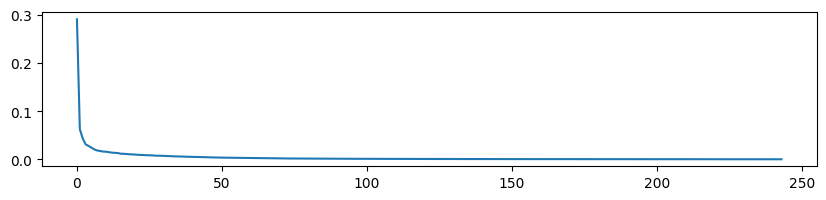

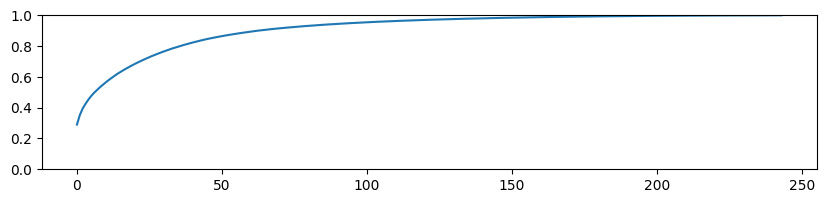

array([0.29, 0.352, 0.395, 0.426, 0.454, 0.478, 0.498, 0.516, 0.534, 0.55])

244

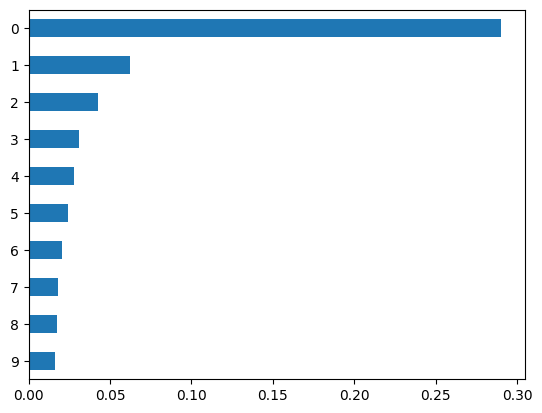

In [47]:
pyplot.figure(figsize=(10, 2))
pyplot.plot(pca.explained_variance_ratio_)
pyplot.show()
pd.Series(pca.explained_variance_ratio_.cumsum()).plot(ylim=(0, 1), figsize=(10, 2))
pyplot.show()
pyplot.plot()
pd.Series(pca.explained_variance_ratio_[:10]).sort_values(ascending=True).plot.barh()
display(pca.explained_variance_ratio_.cumsum()[:10])
display(len(pca.components_))

In [48]:
def get_sector_distribution(portfolios):
    portfolio_df = pd.DataFrame(portfolios)
    portfolio_df["sector"] = [tickers_sector[s] for s in portfolio_df.index.values]
    distributation = portfolio_df.groupby("sector").sum().T
    return distributation

In [49]:
NumComponents = len(pca.components_)  # 4
topPortfolios = pd.DataFrame(
    pca.components_[:NumComponents], columns=all_labels.columns
)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(axis=1), axis=0)
eigen_portfolios.index = [f"Portfolios {i}" for i in range(NumComponents)]

portfolios_sector_distribution = pd.DataFrame(
    columns=all_sectors, index=eigen_portfolios.index
)

for i in range(NumComponents):
    distributation = get_sector_distribution(eigen_portfolios.iloc[i, :])
    portfolios_sector_distribution.iloc[i, :] = distributation[all_sectors]

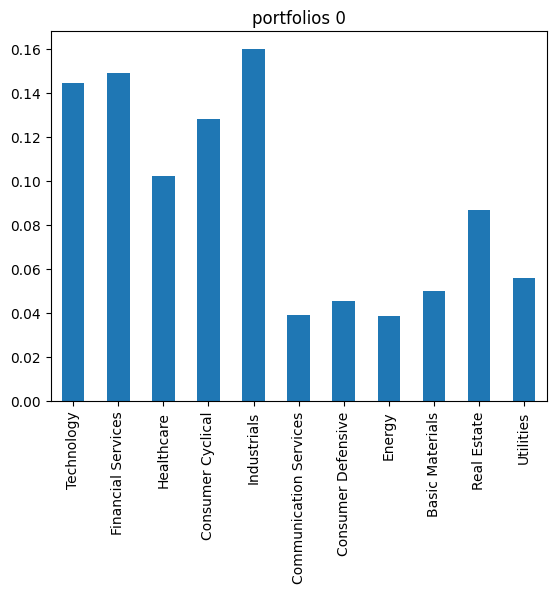

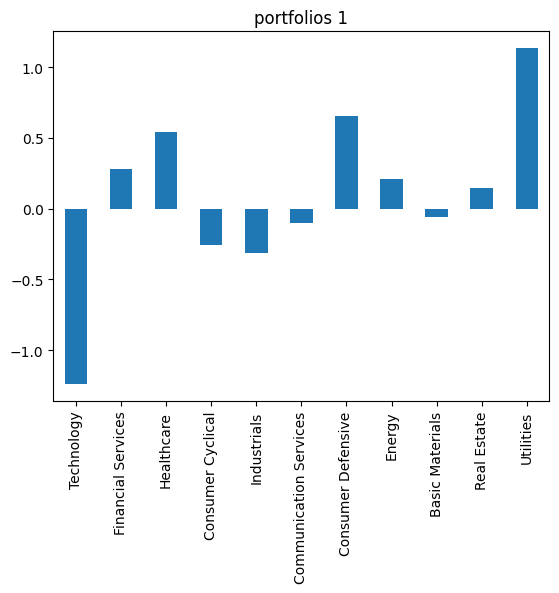

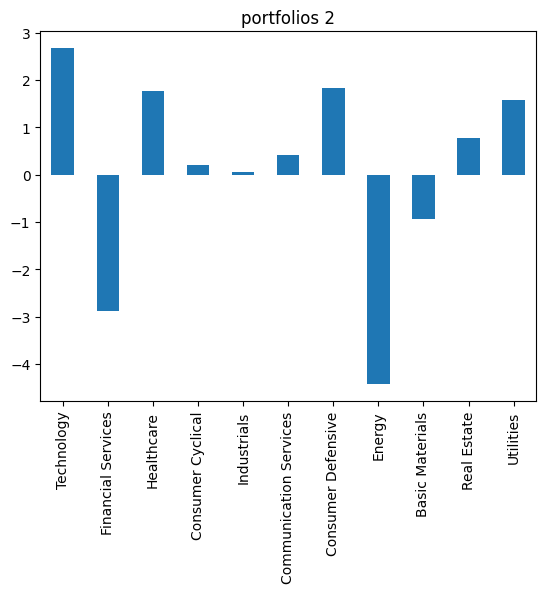

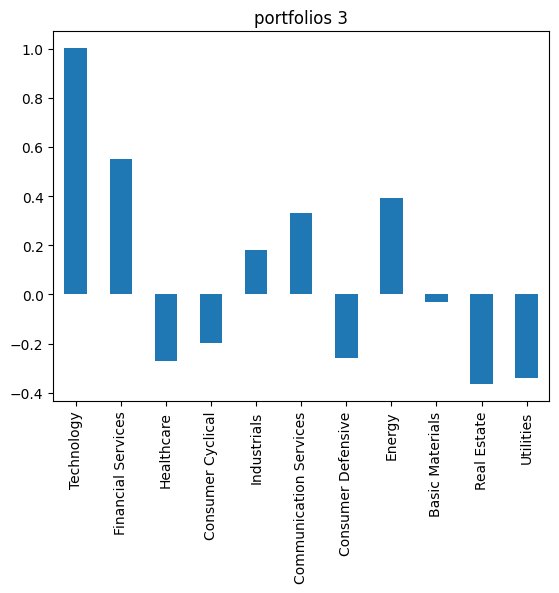

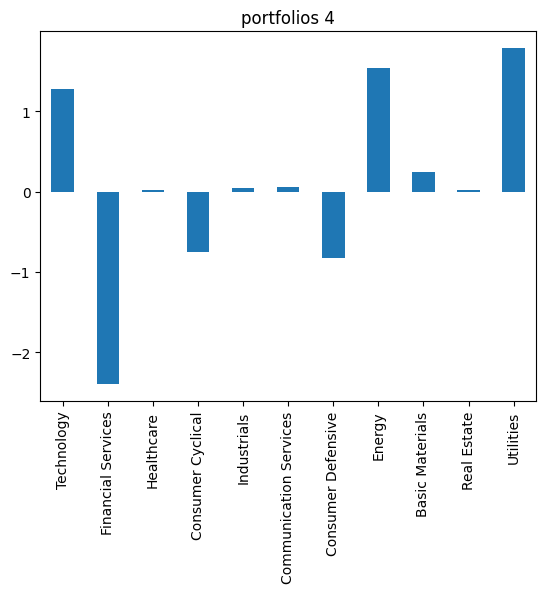

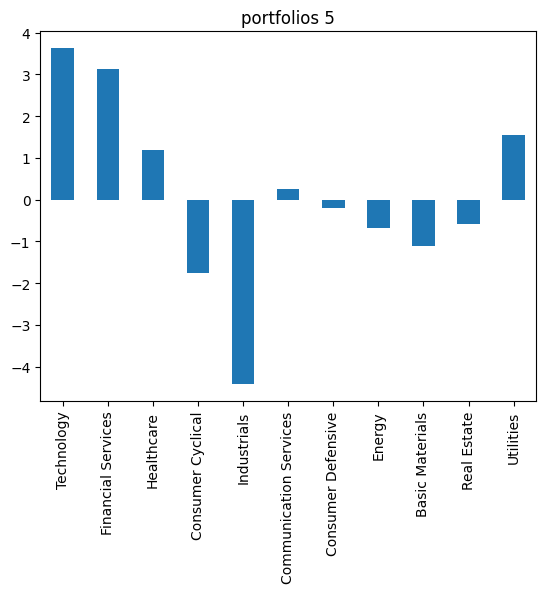

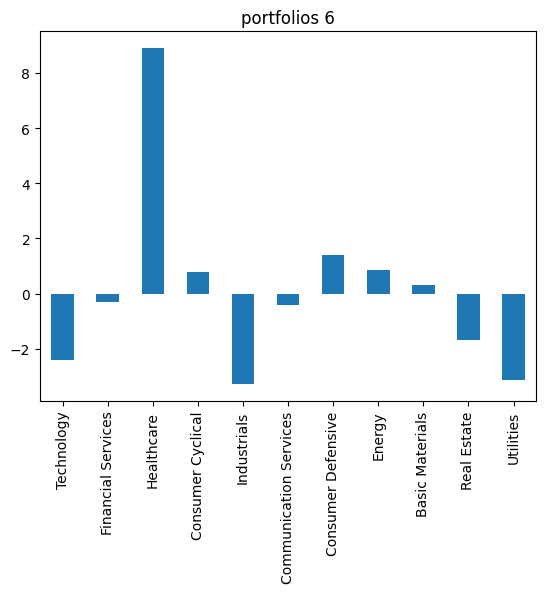

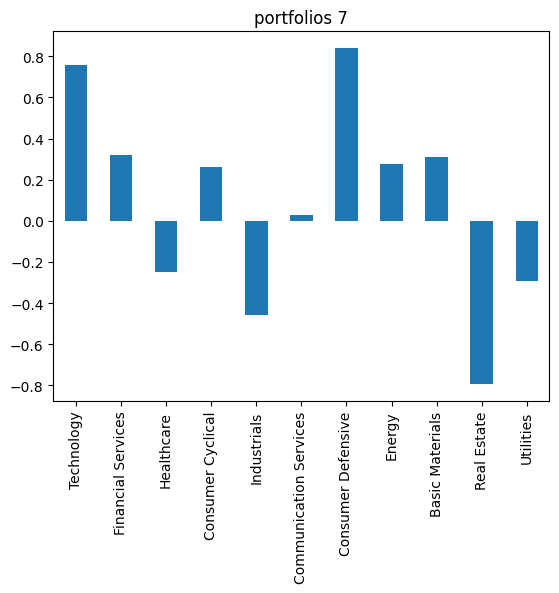

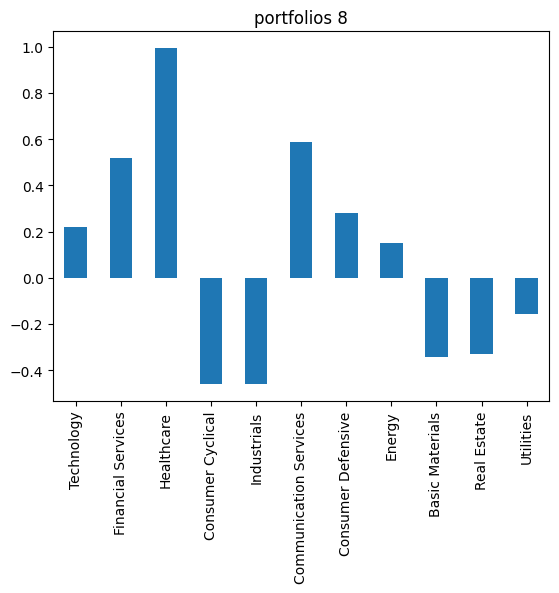

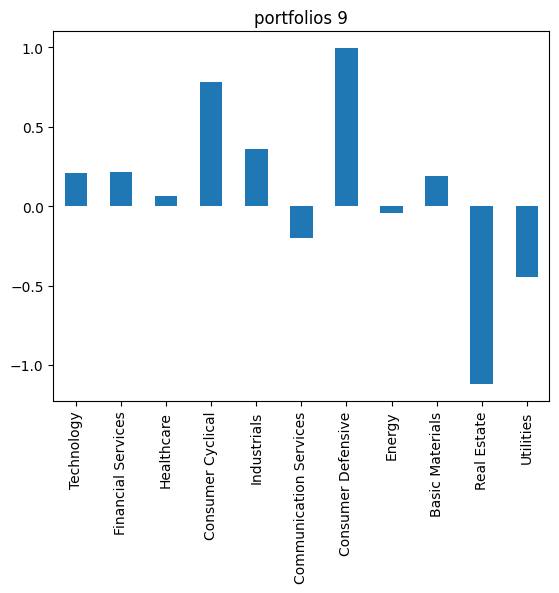

In [50]:
for i in range(0, 10):
    portfolios = portfolios_sector_distribution.iloc[i, :]
    portfolios.plot.bar(title=f"portfolios {i}")
    pyplot.show()

In [51]:
target_portfolios_no = 3
portfolios_sector_distribution.iloc[target_portfolios_no, :]
target_portfolios = pd.DataFrame(eigen_portfolios.iloc[target_portfolios_no, :])
target_portfolios.columns = ["weights"]
target_portfolios["sector"] = [
    tickers_sector[s] for s in target_portfolios.index.values
]
target_IT_stks = target_portfolios[
    (target_portfolios["sector"] == "Technology")
    | (target_portfolios["sector"] == "Communication Services")
].sort_values(by="weights", ascending=False)
with pd.option_context("display.max_rows", sys.maxsize):
    display(target_IT_stks)
target_IT_stks = target_IT_stks[target_IT_stks["weights"] > 0]
target_stk_symbols = target_IT_stks.index.values

,weights,sector
MSI,0.052,Technology
ORCL,0.045,Technology
CDNS,0.041,Technology
CDW,0.041,Technology
ADBE,0.041,Technology
SNPS,0.040,Technology
ANET,0.039,Technology
IT,0.039,Technology
MSFT,0.037,Technology
TYL,0.036,Technology


In [65]:
str = "','".join(target_stk_symbols)
print(f"['{str}']")

['MSI','ORCL','CDNS','CDW','ADBE','SNPS','ANET','IT','MSFT','TYL','KLAC','FICO','AAPL','NOW','VRSN','EA','NVDA','DIS','MU','ROP','GRMN','ACN','FOXA','FOX','MPWR','LDOS','PTC','AKAM','UBER','WDC','LYV','NFLX','TTWO','CDAY','AMD','CHTR','STX','BR','NWS','NWSA','FI','QCOM','CSCO','GEN','GOOG','PANW','GOOGL','CMCSA','LRCX','AMAT','FTNT','AVGO','IBM','TDY','WBD','TMUS','INTU','HPQ','HPE','FIS','JKHY','JBL','JNPR','META','INTC','ANSS','EPAM','CTSH','ADI','APH','IPG','OMC','VZ','PARA','QRVO']
